# Решающие деревья. Домашнее задание

## Что нужно сделать
Решите задачу классификации оттоковых клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора в ближайшее время или нет.

Сделайте первичную обработку данных:

1. Выбросите колонку State.

2. Колонки International plan и Voice mail plan закодируйте следующим образом: Yes замените на 1, а No на 0.

3. Переведите целевую переменную (Churn) в числа: True в 1, а False в 0.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report

In [2]:
cals_df = pd.read_csv("telecom_churn.csv")
cals_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


Набор данных telecom_churn.csv информация о колонках:

State - строка состояния (WV, MN, NY, AL, WI, OH, OR, WY, VA, CT, MI, ID, VT, TX, UT, IN, MD, KS, NC, NJ, MT, CO, NV, WA, RI, MA, MS, AZ, FL, MO, NM, ME, ND, NE, OK, DE, SC, SD, KY, IL, NH, AR, GA,
DC, HI, TN, AK, LA, PA, IA, CA)

Account length - Длина учетной записи

Area code - Код региона

International plan - Международный тарифный план

Voice mail plan - Тарифный план голосовой почты

Number vmail messages - Количество сообщений vmail

Total day minutes - Общее количество минут за день

Total day calls - Общее количество звонков за день

Total day charge - Общая стоимость звонков за день

Total eve minutes - Общее количество минут за вечер

Total eve calls - Общее количество звонков за вечер

Total eve charge - Общее количество четных звонков

Total night minutes - Общее количество ночных минут

Total night calls - Общее количество ночных звонков

Total night charge - Общее количество ночных звонков

Total intl minutes - Общее количество международных минут

Total intl calls - Общее количество международных звонков

Total intl charge - Общая сумма международных платежей

Customer service calls - Количество звонков в службу поддержки

Churn - Отток

In [3]:
# Общая информация по DataFrame
cals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Из общей информации cals_df следует:
1. DataFrame содержит 3333 записей (от индекса 0 до 3332)
2. Всего 20 колонок
3. Нулевые значения отсуствуют
4. Пропущенные значения отсуствуют
5. Колонки: Account length, Area code, Number vmail messages, Total day calls, Total eve calls, Total night calls, Total intl calls и Customer service calls в формате int64 
6. Колонки: Total day minutes, Total day charge, Total eve minutes, Total eve charge, Total night minutes, Total night charge, Total intl minutes и Total intl charge в формате float64
7. Колонки: State, International plan и Voice mail plan в формате object
8. Колонка Churn в формате bool

In [4]:
# Статистический анализ числовых переменных
cals_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [5]:
# Статистический анализ объектных переменных
cals_df.describe(include='object').T

,count,unique,top,freq
State,3333,51,WV,106
International plan,3333,2,No,3010
Voice mail plan,3333,2,No,2411


In [6]:
# Проверка на дубликаты
duplicate_df = cals_df[cals_df.duplicated()]
print("number of duplicate rows: ", duplicate_df.shape)

number of duplicate rows:  (0, 20)


Дубликатов не обнаружено.

In [7]:
# Проверка на NaN значения
cals_df.isnull().any().any()

False

In [8]:
# Проверка на нулевые значения
cals_df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

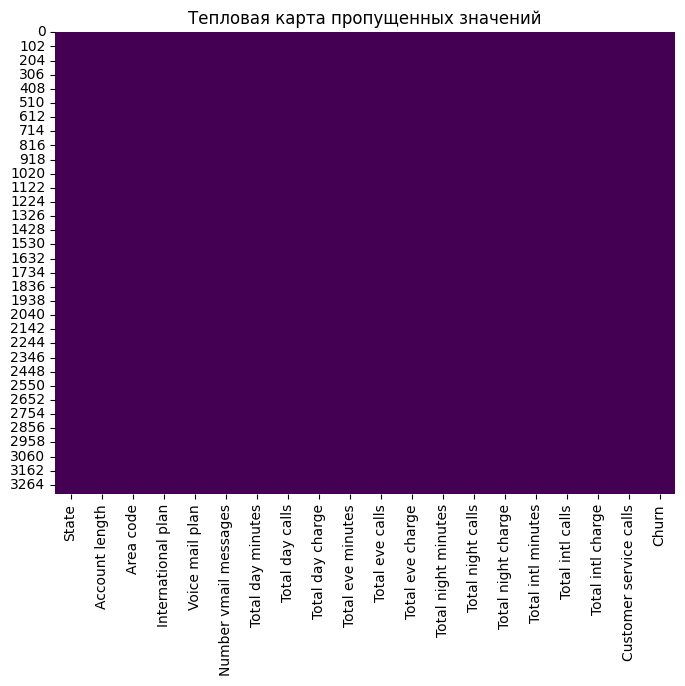

In [9]:
# Визуализация пропущенных значений (тепловая карта)
plt.figure(figsize=(8, 6))
sns.heatmap(cals_df.isnull(), cbar=False, cmap='viridis')
plt.title('Тепловая карта пропущенных значений')
plt.show()

Пропусков/NaN значений не обнаружено. 

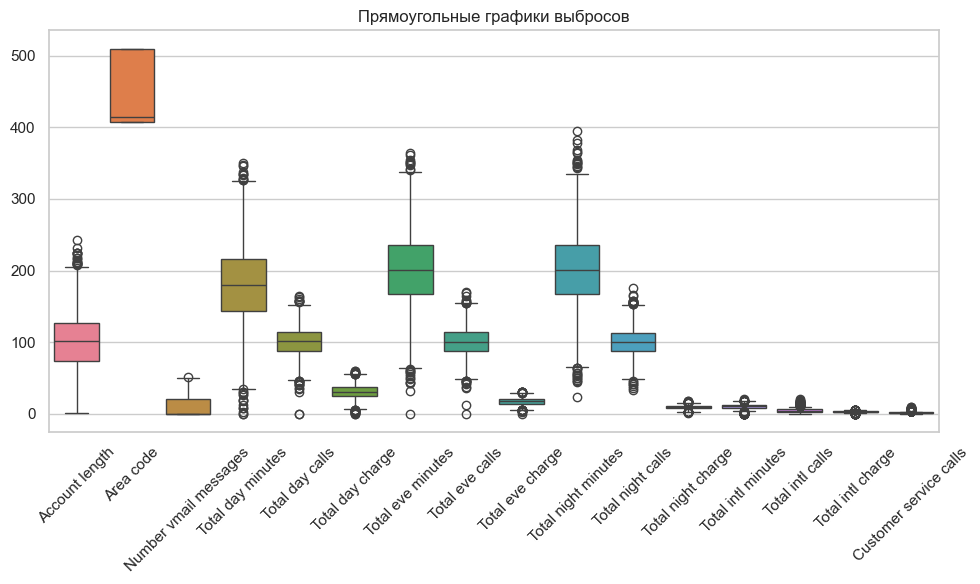

In [10]:
# Установка стиля графиков
sns.set(style="whitegrid")

# Визуализация распределения нескольких выбранных числовых переменных
numerical_columns = cals_df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=numerical_columns)
plt.title("Прямоугольные графики выбросов")
plt.xticks(rotation=45)  # Поворот меток по оси x для лучшей 

plt.tight_layout()
plt.show()

Наблюдаем в колонках множество выбросов, но задание пока не подразумевает их очистку, выполним когда потребуется, чтобы не исказить данные, которые возможно мы должны получить. Так же возможно, что данные выбросы важны для анализа данных в данной задаче.

In [11]:
# Удаляем колонку State согласно условиям задания
cals_df = cals_df.drop('State', axis=1)

In [12]:
# Кодирование столбцов International plan и Voice mail plan
cals_df['International plan'] = cals_df['International plan'].map({'Yes': 1, 'No': 0})
cals_df['Voice mail plan'] = cals_df['Voice mail plan'].map({'Yes': 1, 'No': 0})

# Преобразование целевой переменной Churn
cals_df['Churn'] = cals_df['Churn'].astype(int)

# Проверка изменений
print(cals_df[['International plan', 'Voice mail plan', 'Churn']].head())

   International plan  Voice mail plan  Churn
0                   0                1      0
1                   0                1      0
2                   0                0      0
3                   1                0      0
4                   1                0      0


Выведите на экран первые строки изменённой таблицы, чтобы проверить, что все преобразования сработали.

In [13]:
cals_df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [14]:
cals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Voice mail plan         3333 non-null   int64  
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total day charge        3333 non-null   float64
 8   Total eve minutes       3333 non-null   float64
 9   Total eve calls         3333 non-null   int64  
 10  Total eve charge        3333 non-null   float64
 11  Total night minutes     3333 non-null   float64
 12  Total night calls       3333 non-null   int64  
 13  Total night charge      3333 non-null   float64
 14  Total intl minutes      3333 non-null   

Можем наблюдать, что остались только int64 и float64 форматы данных.

Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [15]:
# Убираем целевую переменную Churn из X
X = cals_df.drop(columns=['Churn'])

# Создание вектора целевой переменной y
y = cals_df['Churn']

Проверьте баланс классов. Является ли выборка сбалансированной?

In [16]:
cals_df['Churn'].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

C:\Users\Esdesu\AppData\Local\Temp\ipykernel_7560\2589177034.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=cals_df, palette='Set2')


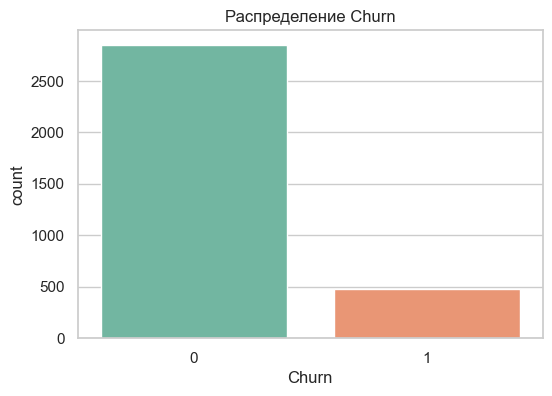

In [17]:
# Проверка баланса категириональных признаков
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=cals_df, palette='Set2')
plt.title("Распределение Churn")
plt.show()

Наблюдаем сильный дисбаланс классов перекос в около 80%.

Я бы перед дальнейшем тренировании модели отчистил данные от выбросов и сбалансировал целевую переменную, однако такой задачи не стоит по этому опускаем это чтобы получить то, что задумывал преподаватель.

Разбейте данные на тренировочную и тестовую части, размер тестовой части — 30%.

In [18]:
# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Параметр test_size=0.3 указывает, что 30% данных будет отведено для тестовой выборки.

# Выводим размеры
print("Размер обучающего набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)

Размер обучающего набора: (2333, 18)
Размер тестового набора: (1000, 18)


Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируйте признаки при помощи [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [19]:
# Создание экземпляра StandardScaler
scaler = StandardScaler()

# Обучение scaler на тренировочных данных и преобразование X_train
X_train_scaled = scaler.fit_transform(X_train)

# Применение scaler к тестовым данным
X_test_scaled = scaler.transform(X_test)

# Проверка размеров и первых нескольких значений отмасштабированных данных
print("Отмасштабированные данные X_train:")
print(X_train_scaled[:5])  # первые 5 строк
print("\nОтмасштабированные данные X_test:")
print(X_test_scaled[:5])  # первые 5 строк

Отмасштабированные данные X_train:
[[-0.5119373   1.74045355 -0.32428911 -0.61219198 -0.5854825   0.41071564
   0.87374876  0.4108768   1.16710225 -1.64631662  1.16773319 -0.45696104
   0.6154429  -0.45828231 -0.37368209  0.22663899 -0.37964317  1.07331888]
 [-0.93900218  1.74045355 -0.32428911 -0.61219198 -0.5854825  -0.86471343
   1.07487413 -0.86509518 -2.63902073 -1.89535096 -2.63790053 -0.79079045
   1.07503868 -0.78992508 -0.12283524 -0.99731649 -0.12747878  1.07331888]
 [ 0.39243537  1.74045355 -0.32428911  1.63347452  0.28917962  0.75205349
   0.37093535  0.75199959 -0.98418465  0.89383368 -0.98307564 -0.4255418
  -1.01867543 -0.42337255 -0.44535262  0.63462415 -0.44600221  0.3233779 ]
 [-0.73803047 -0.51584265 -0.32428911 -0.61219198 -0.5854825   1.81460518
   0.47149803  1.81423007 -0.21192781 -1.64631662 -0.21128755  1.07079943
  -0.81441064  1.06901989  0.52219952  1.04260932  0.52283991 -1.17650408]
 [ 0.49292123  1.74045355 -0.32428911  1.63347452  2.54872343 -0.03889605


После масштабирования признаков X_train и X_test перестали быть объектами типа pd.DataFrame, это неудобно. Приведите их снова к pd.DataFrame.

In [20]:
# Приведение отмасштабированных данных к типу pd.DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Проверка первых нескольких строк отмасштабированных DataFrame
print("Отмасштабированные данные X_train в формате DataFrame:")
print(X_train_scaled_df.head())  # первые 5 строк
print("\nОтмасштабированные данные X_test в формате DataFrame:")
print(X_test_scaled_df.head())  # первые 5 ст

Отмасштабированные данные X_train в формате DataFrame:
      Account length  Area code  International plan  Voice mail plan  \
2016       -0.511937   1.740454           -0.324289        -0.612192   
1362       -0.939002   1.740454           -0.324289        -0.612192   
2670        0.392435   1.740454           -0.324289         1.633475   
2210       -0.738030  -0.515843           -0.324289        -0.612192   
1846        0.492921   1.740454           -0.324289         1.633475   

      Number vmail messages  Total day minutes  Total day calls  \
2016              -0.585483           0.410716         0.873749   
1362              -0.585483          -0.864713         1.074874   
2670               0.289180           0.752053         0.370935   
2210              -0.585483           1.814605         0.471498   
1846               2.548723          -0.038896         0.823467   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
2016          0.410877       

Обучите на тренировочных данных с параметрами по умолчанию:

1) логистическую регрессию;

2) метод опорных векторов (с kernel='linear').

In [21]:
# 1. Обучение логистической регрессии
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled_df, y_train)

LogisticRegression()

In [22]:
# 2. Обучение метода опорных векторов с линейным ядром
# , probability=True включает метрику оценки predict_proba
svс_model = SVC(kernel='linear', probability=True)
svс_model.fit(X_train_scaled_df, y_train)

SVC(kernel='linear', probability=True)

С помощью обученных моделей сделайте предсказание на тестовых данных.

Точность LogisticRegression: 0.8620
ROC AUC LogisticRegression: 0.8282
Отсчёт LogisticRegression
:               precision    recall  f1-score   support

           0       0.88      0.97      0.92       857
           1       0.55      0.21      0.30       143

    accuracy                           0.86      1000
   macro avg       0.71      0.59      0.61      1000
weighted avg       0.83      0.86      0.83      1000

Точность SVC: 0.8570
ROC AUC SVC: 0.7402
Отсчёт SVC
:               precision    recall  f1-score   support

           0       0.86      1.00      0.92       857
           1       0.00      0.00      0.00       143

    accuracy                           0.86      1000
   macro avg       0.43      0.50      0.46      1000
weighted avg       0.73      0.86      0.79      1000



c:\Users\Esdesu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Esdesu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Esdesu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

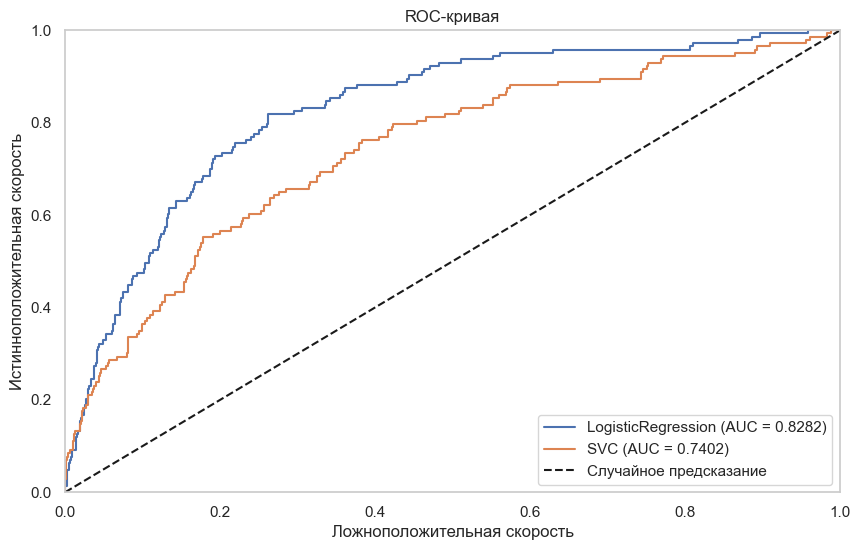

In [29]:
# Модель LogisticRegression
# Предсказание на тестовых данных с использованием логистической регрессии
y_pred_logistic = logistic_model.predict(X_test_scaled_df)
# Вероятности для ROC AUC
y_pred_proba_logistic = logistic_model.predict_proba(X_test_scaled_df)[:, 1] 


# Оценка точности модели логистической регрессии
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_pred_proba_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)

print(f"Точность LogisticRegression: {accuracy_logistic:.4f}")
print(f"ROC AUC LogisticRegression: {roc_auc_logistic:.4f}")
print(f"Отсчёт LogisticRegression\n: {report_logistic}")

# Модель SVC
# Прогнозирование на тестовых данных
y_pred_svс = svс_model.predict(X_test_scaled_df)
# Вероятности для ROC AUC
y_pred_proba_svm = svс_model.predict_proba(X_test_scaled_df)[:, 1] 

# Оценка точности модели SVM
accuracy_svс = accuracy_score(y_test, y_pred_svс)
roc_auc_svс = roc_auc_score(y_test, y_pred_proba_svm)
report_svc = classification_report(y_test, y_pred_svс)

print(f"Точность SVC: {accuracy_svс:.4f}")
print(f"ROC AUC SVC: {roc_auc_svс:.4f}")
print(f"Отсчёт SVC\n: {report_svc}")

# Построение ROC-кривых
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_proba_logistic)
fpr_svс, tpr_svс, _ = roc_curve(y_test, y_pred_proba_svm)

plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic, tpr_logistic, label=f'LogisticRegression (AUC = {roc_auc_logistic:.4f})')
plt.plot(fpr_svс, tpr_svс, label=f'SVС (AUC = {roc_auc_svс:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Случайное предсказание')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Ложноположительная скорость')
plt.ylabel('Истинноположительная скорость')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.grid()
plt.show()


LogisticRegression показывает хорошую точность 0.86 и ROC 0.82, что указывает на приемлемую способность различать классы. 

Высокая точность и полнота для класса 0 (негативный класс) указывают на то, что модель хорошо распознает негативные примеры,однако имеет низкие показатели для класса 1: низкая точность 0.55 и полнота 0.21 указывают на проблемы с распознаванием положительных примеров.

SVC имеет схожую общую точность 0.85 но более низкий ROC 0.74, что указывает на хужее разделение классов.

Полная неудача в распознавании класса 1 нулевая точность и полнота означает, что модель не смогла правильно классифицировать ни одного положительного примера. Это может быть связано с тем, что модель слишком сильно подстраивается под класс 0 и игнорирует класс 1.

На графике ROC-кривых видно, что кривая LogisticRegression будет выше кривой SVM, что подтверждает, что LogisticRegression лучше справляется с задачей классификации. Кривая, приближающаяся к верхнему левому углу графика, указывает на более высокую истинноположительную скорость при низкой ложноположительной скорости, что является хорошим результатом для любой классификационной модели.

Теперь обучите решающее дерево с параметрами по умолчанию на тренировочных данных, сделайте предсказание на тесте. Используйте метрику для оценки.

Точность решающего дерева: 0.9170
ROC AUC решающего дерева: 0.8438


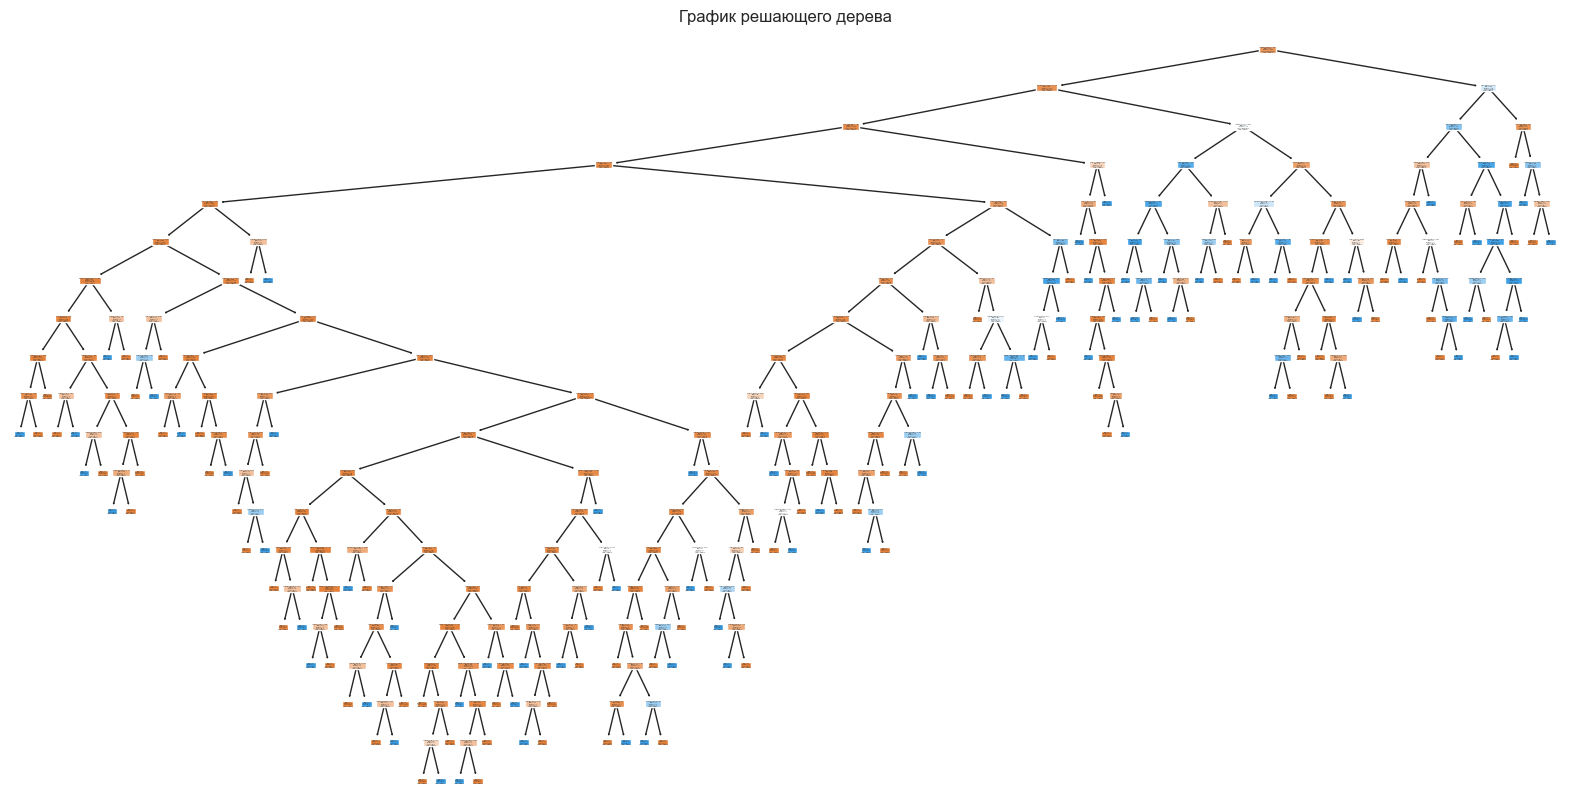

In [24]:
# Обучение решающего дерева
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_scaled_df, y_train)

# 2. Прогнозирование на тестовых данных
y_pred_tree = decision_tree_model.predict(X_test_scaled_df)
# Вероятности для ROC AUC
y_pred_proba_tree = decision_tree_model.predict_proba(X_test_scaled_df)[:, 1]  

# Оценка производительности
accuracy_tree = accuracy_score(y_test, y_pred_tree)
roc_auc_tree = roc_auc_score(y_test, y_pred_proba_tree)

print(f"Точность решающего дерева: {accuracy_tree:.4f}")
print(f"ROC AUC решающего дерева: {roc_auc_tree:.4f}")

# Построение графика дерева
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, filled=True, feature_names=X_train_scaled_df.columns, class_names=['Class 0', 'Class 1'])
plt.title('График решающего дерева')
plt.show()

DecisionTreeClassifier на базывых параметрах состовляет 0.91 это означает, что модель правильно классифицирует и это хороший результат, ROC выше 0.8 и состовляет 0.84 это говорит о том, что модель может хорошо различать положительные и отрицательные классы.

Нужно ли масшабировать признаки для обучения решающего дерева? Проверьте это, заново разбив данные на тренировочную и тестовую части (назовите новые полученные объекты новыми названиями), и проведите обучение, предсказание и оценку метрики до масштабирования и после.

Точность дерева решений без масштабирования: 0.9140
ROC AUC дерева решений без масштабирования: 0.8333
Отсчёт без маштобирования
:               precision    recall  f1-score   support

           0       0.95      0.95      0.95       857
           1       0.69      0.72      0.71       143

    accuracy                           0.91      1000
   macro avg       0.82      0.83      0.83      1000
weighted avg       0.92      0.91      0.91      1000

Точность дерева решений с масштабированием: 0.9140
ROC AUC дерева решений с масштабированием: 0.8391
Отсчёт с маштобированием
:               precision    recall  f1-score   support

           0       0.96      0.94      0.95       857
           1       0.69      0.73      0.71       143

    accuracy                           0.91      1000
   macro avg       0.82      0.84      0.83      1000
weighted avg       0.92      0.91      0.92      1000


Сравнение фактических и предсказанных значений без масштабирования:
      Actual  Deci

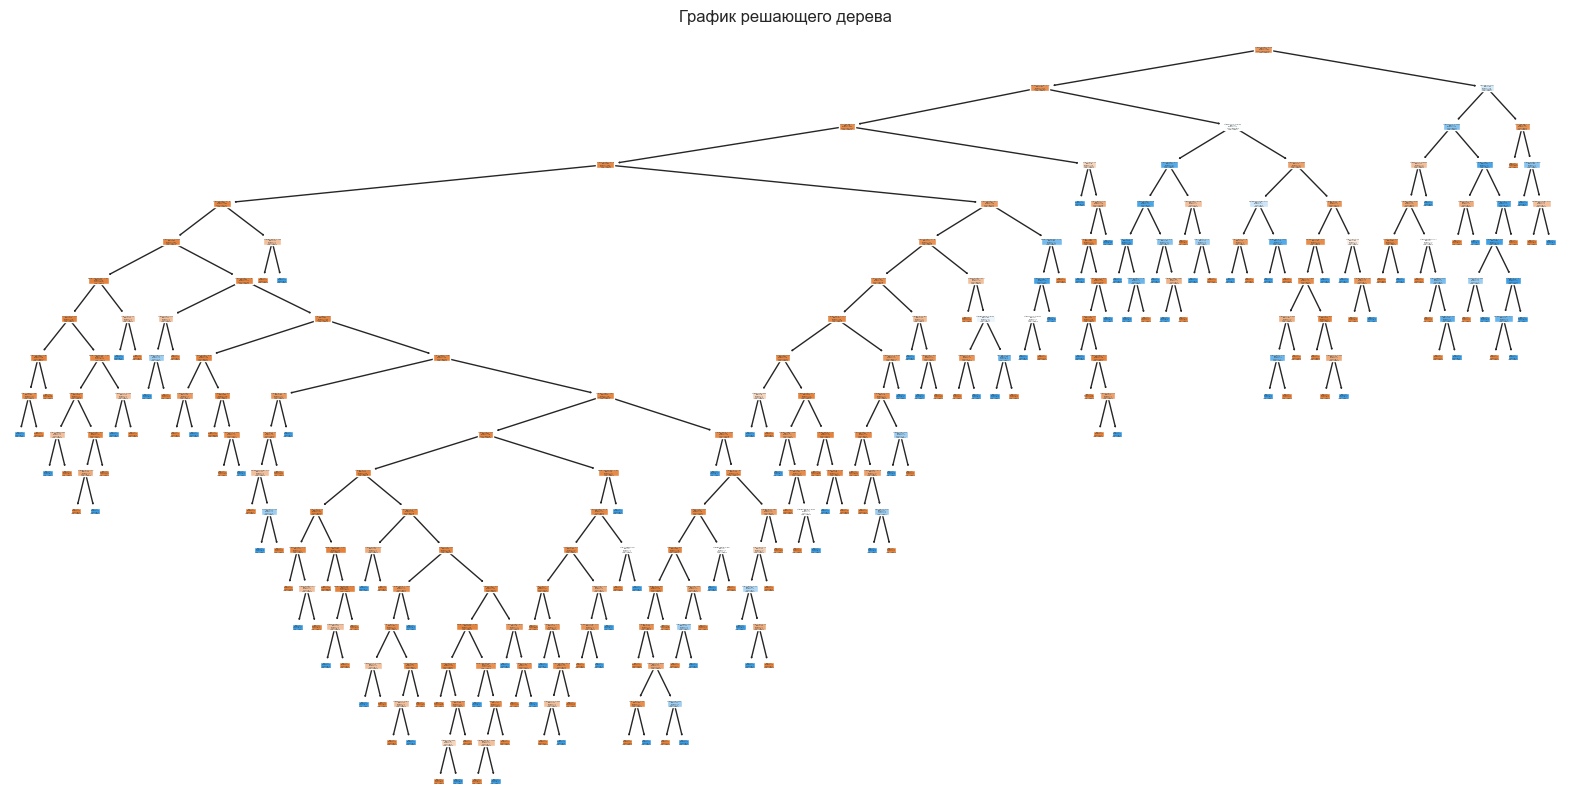


Сравнение графика с масштабированием:


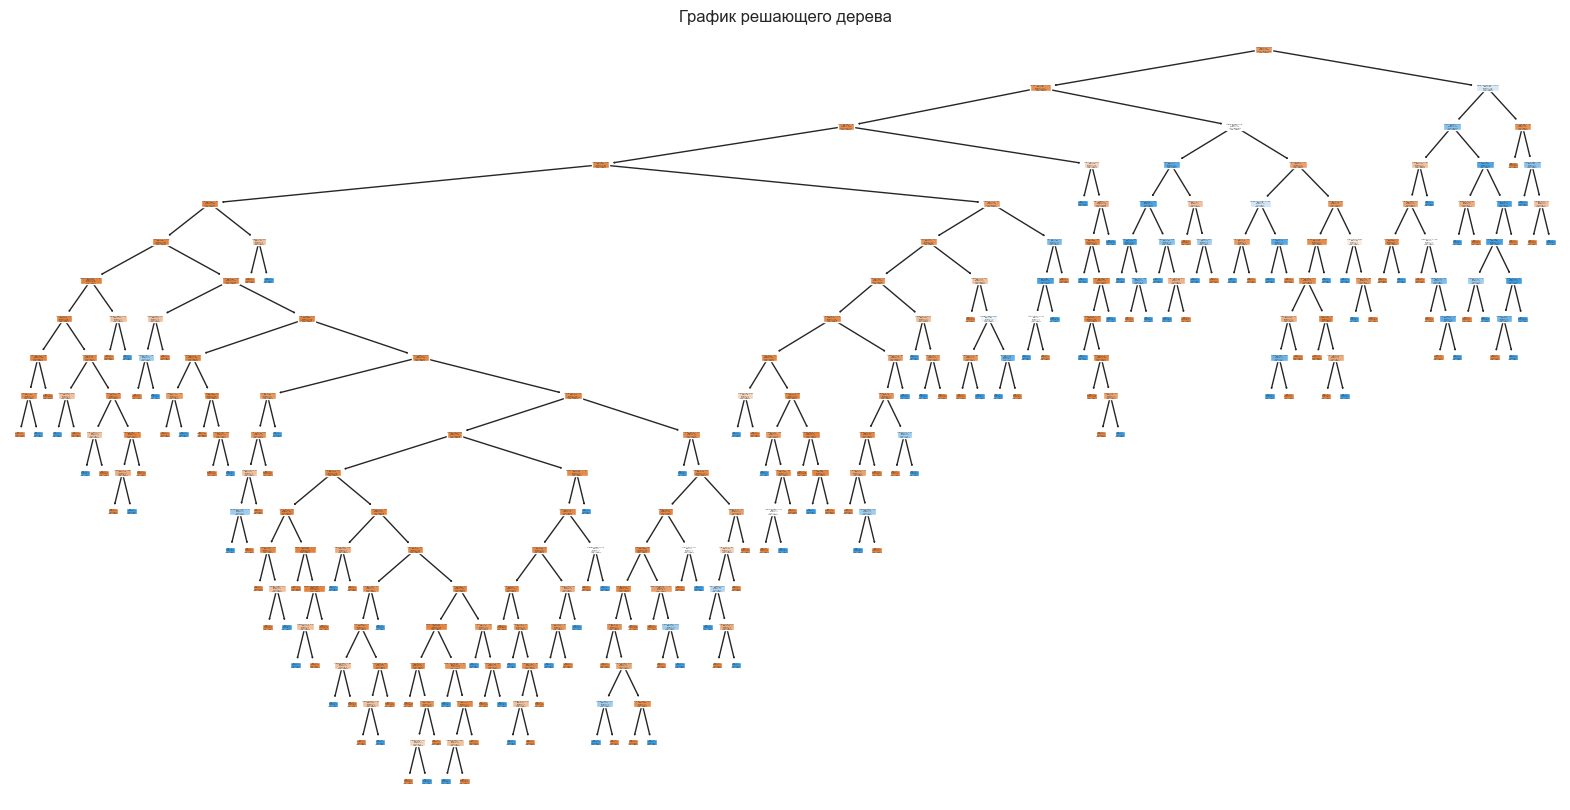

In [27]:
# Разделим данные на тренировочные и тестовые выборки
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение дерева решений без масштабирования
decision_tree_model_raw = DecisionTreeClassifier()
decision_tree_model_raw.fit(X_train_raw, y_train_raw)

# Предсказание на тестовых данных без масштабирования
y_pred_tree_raw = decision_tree_model_raw.predict(X_test_raw)
# Вероятности для ROC AUC
y_pred_proba_raw = decision_tree_model_raw.predict_proba(X_test_raw)[:, 1]  

# Оценка точности и ROC AUC дерева решений без масштабирования
accuracy_tree_raw = accuracy_score(y_test_raw, y_pred_tree_raw)
roc_auc_tree_raw = roc_auc_score(y_test_raw, y_pred_proba_raw)
report_raw = classification_report(y_test_raw, y_pred_tree_raw)

print(f"Точность дерева решений без масштабирования: {accuracy_tree_raw:.4f}")
print(f"ROC AUC дерева решений без масштабирования: {roc_auc_tree_raw:.4f}")
print(f"Отсчёт без маштобирования\n: {report_raw}")

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled_raw = scaler.fit_transform(X_train_raw)
X_test_scaled_raw = scaler.transform(X_test_raw)

# Приведение отмасштабированных данных к типу pd.DataFrame
X_train_scaled_raw_df = pd.DataFrame(X_train_scaled_raw, columns=X_train.columns, index=X_train.index)
X_test_scaled_raw_df = pd.DataFrame(X_test_scaled_raw, columns=X_test.columns, index=X_test.index)

# Обучение дерева решений с масштабированием
decision_tree_model_scaled = DecisionTreeClassifier()
decision_tree_model_scaled.fit(X_train_scaled_raw_df, y_train_raw)

# Предсказание на тестовых данных с масштабированием
y_pred_tree_scaled = decision_tree_model_scaled.predict(X_test_scaled_raw_df)
# Вероятности для ROC AUC
y_pred_proba_scaled = decision_tree_model_scaled.predict_proba(X_test_scaled_raw_df)[:, 1]

# Оценка точности и ROC AUC дерева решений с масштабированием и отсчёт по классам
accuracy_tree_scaled = accuracy_score(y_test_raw, y_pred_tree_scaled)
roc_auc_tree_scaled = roc_auc_score(y_test_raw, y_pred_proba_scaled)
report_scaled = classification_report(y_test_raw, y_pred_tree_scaled)

print(f"Точность дерева решений с масштабированием: {accuracy_tree_scaled:.4f}")
print(f"ROC AUC дерева решений с масштабированием: {roc_auc_tree_scaled:.4f}")
print(f"Отсчёт с маштобированием\n: {report_scaled}")

# Сравнение фактических и предсказанных значений без масштабирования
predictions_df_raw = pd.DataFrame({
    'Actual': y_test_raw,
    'Decision_Tree_Predicted_Raw': y_pred_tree_raw
})

# Сравнение фактических и предсказанных значений с масштабированием
predictions_df_scaled = pd.DataFrame({
    'Actual': y_test_raw,
    'Decision_Tree_Predicted_Scaled': y_pred_tree_scaled
})

# Вывод первых нескольких строк DataFrame с предсказаниями
print("\nСравнение фактических и предсказанных значений без масштабирования:")
print(predictions_df_raw.head())

print("\nСравнение фактических и предсказанных значений с масштабированием:")
print(predictions_df_scaled.head())

# Построение графика дерева без маштабирования
print("\nСравнение графика без масштабирования:")
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model_raw, filled=True, feature_names=X_train_raw.columns, class_names=['Class 0', 'Class 1'])
plt.title('График решающего дерева')
plt.show()

# Построение графика дерева с маштабированием
print("\nСравнение графика с масштабированием:")
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model_scaled, filled=True, feature_names=X_train_scaled_raw_df.columns, class_names=['Class 0', 'Class 1'])
plt.title('График решающего дерева')
plt.show()

Модель дерева решений показывает высокую точность как без масштабирования, так и с масштабированием.

Оба варианта демонстрируют высокую точность, что указывает на то, что модель хорошо предсказывает классы. 

ROC немного увеличился при использовании масштабирования, что указывает на лучшее разделение классов и, возможно, более стабильную работу модели на тестовых данных.


Precision (точность) для класса 0 (негативный класс) повысился с 0.95 до 0.96 при масштабировании, что свидетельствует о том, что модель стала более точной в предсказании этого класса.

Recall (полнота) для класса 1 (позитивный класс) немного увеличился с 0.72 до 0.73 при масштабировании, что также является положительным знаком, так как модель лучше распознает положительные примеры.

F1-score для обоих классов остался на схожем уровне, что указывает на сбалансированное представление между точностью и полнотой.

Представленные данные о предсказаниях показывают, что обе модели без и с маштабированием дают одинаковые предсказания для первых нескольких примеров. Это может указывать на то, что в данном наборе данных масштабирование не сильно изменяет предсказания, хотя оно может влиять на другие аспекты, такие как стабильность и обобщающая способность модели.

Какая модель справилась с решением задачи?

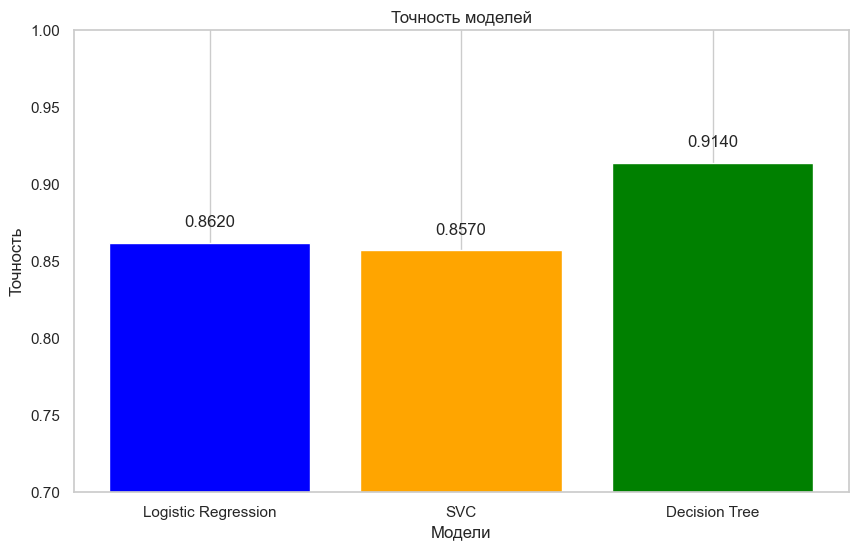

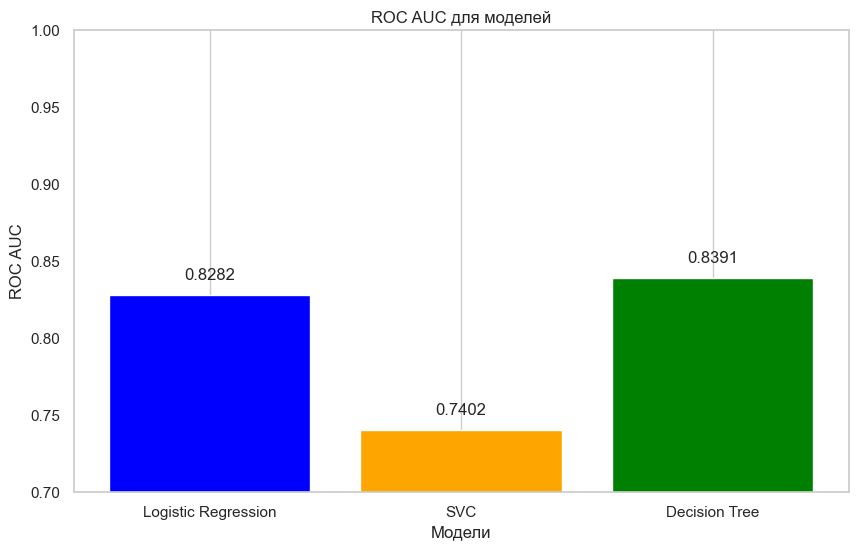

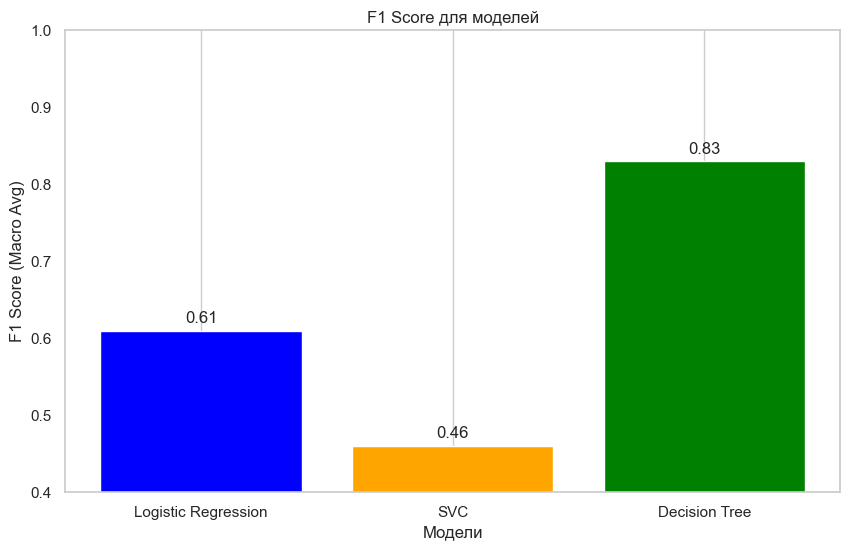

In [31]:
# Данные для графиков
models = ['Logistic Regression', 'SVC', 'Decision Tree']
accuracy = [0.8620, 0.8570, 0.9140]
roc_auc = [0.8282, 0.7402, 0.8391]
f1_scores = [0.61, 0.46, 0.83]

# График точности
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['blue', 'orange', 'green'])
plt.ylim(0.7, 1.0)
plt.title('Точность моделей')
plt.xlabel('Модели')
plt.ylabel('Точность')
plt.grid(axis='y')

# Добавление значений на столбцы
for i, v in enumerate(accuracy):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')

plt.show()

# График ROC AUC
plt.figure(figsize=(10, 6))
plt.bar(models, roc_auc, color=['blue', 'orange', 'green'])
plt.ylim(0.7, 1.0)
plt.title('ROC AUC для моделей')
plt.xlabel('Модели')
plt.ylabel('ROC AUC')
plt.grid(axis='y')

# Добавление значений на столбцы
for i, v in enumerate(roc_auc):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')

plt.show()

# График F1-score
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color=['blue', 'orange', 'green'])
plt.ylim(0.4, 1.0)
plt.title('F1 Score для моделей')
plt.xlabel('Модели')
plt.ylabel('F1 Score (Macro Avg)')
plt.grid(axis='y')

# Добавление значений на столбцы
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.show()


DecisionTreeClassifier с масштабированием это наилучшие результаты по всем метрикам, что делает его наиболее предпочтительным выбором для данной задачи.

Logistic Regression показывает сбалансированные результаты, особенно для класса 0, но требует улучшений для класса 1.

SVC неэффективен для распознавания класса 1, что делает его менее подходящим для данной задачи.